In [80]:
# Dependencies and Setup
import os
import pandas as pd
from citipy import citipy # get city and country designations based on latitude and longitude
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import json
import requests
import time
import datetime as dt # to put a datestamp on the outputs
# Import api keys
from api_keys import api_key
# Get city and country designations based on latitude and longitude. Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [59]:
# Get today's date  for the file stamp
today = dt.datetime.today().strftime('%Y%m%d')

In [60]:
# Create a csv file as the Output File (CSV)
output_data_file = "output_data/cities.csv"

# specify range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [61]:
# Create a list to hold the randomly generated list 
coords = []
cities = []

In [62]:
##Creating a list of cities
# To make sure selction is random, 2000 random numbers between -90 and 90 (for latitude) & bet. -180 and 180 (for longitude) are generated.

#Note: Latitude is a geographic location which varies from 0 to 90 in the north and 0 to -90 inn the south with equatoer at zero.
#Note: longitude indicates the point's distance east or west from the Prime Meridian in England expressed in radians
#Note Coordinates are pairs of latitudes and longitudes on earths suraface that point to different locstions.

In [63]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
coords = zip(lats, lngs)

In [64]:
#Need to make sure the randomly generated cord are actual cities (not water/ocean/hills etc.) and also there are no repeats. 
#Therefore we need to get nearest cities to the randomly generated coordinates.
# Introduce the if statement for uniques 
    #Several coordinates generated can point to the same city, leading to duplicates. 
    # Therefore list of cities are further filtered for duplicates.
    #End of this code we have identified a list of unique cities and printed the number of unique cities

In [65]:
# Identify nearest city for each lat, lng combination by accesing citipy depenency
for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
      
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(len(cities))
#print (cities)



731


In [66]:
### Perform API Calls for the weather 
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [73]:
# Start a URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Create a list to store weather data related to each city and name it city_data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters. Purpose to save cities in group of 50. 
#"i" loops through cities 0 to 50 and record r counts from 1 onwards
#set intial values of the variables to 1 

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list by using this command called enmuerate which uses indexes and starts from 0 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes. Set i to 0 to 50 and save it as record 0 and loop it 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
# Create endpoint URL with each city. Create a new string object from the given object. 
#If encoding or errors is specified, then the object must expose a data bufferthat will be decoded using the given encoding and error handler.

    city_url = url + "&q=" + city
    print (city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
     # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # get varibales such as  max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=bredasdorp
Processing Record 1 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=ukiah
Processing Record 2 of Set 1 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=abalak
Processing Record 3 of Set 1 | abalak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=nizhneyansk
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=la ronge
Processing Record 5 of Set 1 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=chapais
Processing Record 6 of Set 1 | chapais
ht

Processing Record 2 of Set 2 | viseu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=mazatlan
Processing Record 3 of Set 2 | mazatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=itarema
Processing Record 4 of Set 2 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=zaltan
Processing Record 5 of Set 2 | zaltan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=aflu
Processing Record 6 of Set 2 | aflu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=atuona
Processing Record 7 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=bethel
Processing Record 8 of Set 2 | bethel
http://api.openweathermap.org/data/2.5/weathe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=mahebourg
Processing Record 5 of Set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=goderich
Processing Record 6 of Set 3 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=belushya guba
Processing Record 7 of Set 3 | belushya guba
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=luena
Processing Record 8 of Set 3 | luena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=geraldton
Processing Record 9 of Set 3 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=karymskoye
Processing Record 10 of Set 3 | karymskoye
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=beringovskiy
Processing Record 7 of Set 4 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=saint-philippe
Processing Record 8 of Set 4 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=nara
Processing Record 9 of Set 4 | nara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=bukachacha
Processing Record 10 of Set 4 | bukachacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=oksfjord
Processing Record 11 of Set 4 | oksfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=kichera
Processing Record 12 of Set 4 | kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=aguada de pasajeros
Processing Record 10 of Set 5 | aguada de pasajeros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=mehamn
Processing Record 11 of Set 5 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=salalah
Processing Record 12 of Set 5 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=katangli
Processing Record 13 of Set 5 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=capanema
Processing Record 14 of Set 5 | capanema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=chamba
Processing Record 15 of Set 5 | chamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=victoria
Processing Record 12 of Set 6 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=hihifo
Processing Record 13 of Set 6 | hihifo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=auki
Processing Record 14 of Set 6 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=lebu
Processing Record 15 of Set 6 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=richards bay
Processing Record 16 of Set 6 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=beira
Processing Record 17 of Set 6 | beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=bwanga
Processing Record 15 of Set 7 | bwanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=jacmel
Processing Record 16 of Set 7 | jacmel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=canutama
Processing Record 17 of Set 7 | canutama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=pacific grove
Processing Record 18 of Set 7 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=kununurra
Processing Record 19 of Set 7 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=cherskiy
Processing Record 20 of Set 7 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d700

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=stepnyak
Processing Record 19 of Set 8 | stepnyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=bubaque
Processing Record 20 of Set 8 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=asayita
Processing Record 21 of Set 8 | asayita
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=fort-shevchenko
Processing Record 22 of Set 8 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=constitucion
Processing Record 23 of Set 8 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=alofi
Processing Record 24 of Set 8 | alofi
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=ibra
Processing Record 22 of Set 9 | ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=inuvik
Processing Record 23 of Set 9 | inuvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=caravelas
Processing Record 24 of Set 9 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=malatya
Processing Record 25 of Set 9 | malatya
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=san ramon
Processing Record 26 of Set 9 | san ramon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=alamogordo
Processing Record 27 of Set 9 | alamogordo
http://api.openweathermap.org/data/2.5/weather?units=Imperia

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=popondetta
Processing Record 25 of Set 10 | popondetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=honningsvag
Processing Record 26 of Set 10 | honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=el penol
Processing Record 27 of Set 10 | el penol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=yichang
Processing Record 28 of Set 10 | yichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=brandon
Processing Record 29 of Set 10 | brandon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=dinsor
Processing Record 30 of Set 10 | dinsor
City not found. Skipping...
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=skjervoy
Processing Record 27 of Set 11 | skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=muncar
Processing Record 28 of Set 11 | muncar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=semme
Processing Record 29 of Set 11 | semme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=mandapam
Processing Record 30 of Set 11 | mandapam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=north adams
Processing Record 31 of Set 11 | north adams
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=kruisfontein
Processing Record 32 of Set 11 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e2

Processing Record 28 of Set 12 | juru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=kollam
Processing Record 29 of Set 12 | kollam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=bardiyah
Processing Record 30 of Set 12 | bardiyah
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=tamiahua
Processing Record 31 of Set 12 | tamiahua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=los llanos de aridane
Processing Record 32 of Set 12 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=pulsano
Processing Record 33 of Set 12 | pulsano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=hervey bay
Processing Record 34 of Set 12

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=manjeshwar
Processing Record 30 of Set 13 | manjeshwar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=magdagachi
Processing Record 31 of Set 13 | magdagachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=cap malheureux
Processing Record 32 of Set 13 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=jay
Processing Record 33 of Set 13 | jay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=quatre cocos
Processing Record 34 of Set 13 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=tilichiki
Processing Record 35 of Set 13 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imp

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=slave lake
Processing Record 33 of Set 14 | slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=gigmoto
Processing Record 34 of Set 14 | gigmoto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=maloy
Processing Record 35 of Set 14 | maloy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=buraydah
Processing Record 36 of Set 14 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=the valley
Processing Record 37 of Set 14 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11e268d7000ffbfbfb0d590b6edeaf77&q=manoel urbano
Processing Record 38 of Set 14 | manoel urbano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

In [76]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_frame = pd.DataFrame(city_data)
# Extract relevant fields from the data frame
lats_city = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()
city_frame

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,68,ZA,1540584000,88,-34.53,20.04,68.00,8.05
1,ukiah,1,US,1540587360,22,39.15,-123.21,80.60,3.36
2,abalak,0,NE,1540589782,65,15.46,6.28,79.06,2.98
3,la ronge,90,CA,1540586820,93,55.10,-105.30,32.00,4.70
4,chapais,90,CA,1540588500,62,49.78,-74.86,21.20,9.17
5,kaitangata,88,NZ,1540588619,89,-46.28,169.85,48.96,4.21
6,turan,8,RU,1540589784,77,52.15,93.92,8.64,1.52
7,vaini,8,IN,1540588572,61,15.34,74.49,69.12,6.44
8,albion,1,US,1540588500,32,41.69,-98.00,66.20,13.87
9,waingapu,0,ID,1540589785,98,-9.65,120.26,68.04,3.09


In [77]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,68,ZA,1540584000,88,-34.53,20.04,68.00,8.05
1,ukiah,1,US,1540587360,22,39.15,-123.21,80.60,3.36
2,abalak,0,NE,1540589782,65,15.46,6.28,79.06,2.98
3,la ronge,90,CA,1540586820,93,55.10,-105.30,32.00,4.70
4,chapais,90,CA,1540588500,62,49.78,-74.86,21.20,9.17


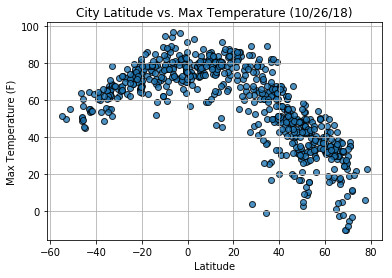

In [81]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats_city, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

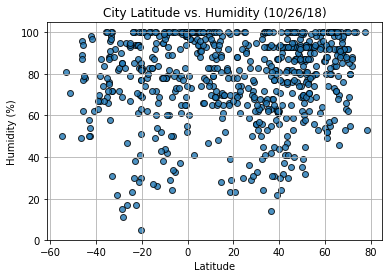

In [82]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats_city, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

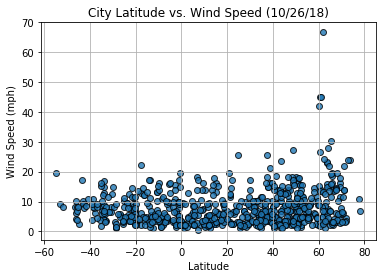

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats_city, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()